In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [35]:
df = pd.read_csv("diamond.csv")
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     308 non-null    int64  
 1   carat          308 non-null    float64
 2   colour         308 non-null    object 
 3   clarity        308 non-null    object 
 4   certification  308 non-null    object 
 5   price          308 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.6+ KB


In [37]:
df[["price", "carat",]].corr()

,price,carat
price,1.000000,0.944727
carat,0.944727,1.000000


In [38]:
X = df["carat"]
Y = df["price"]

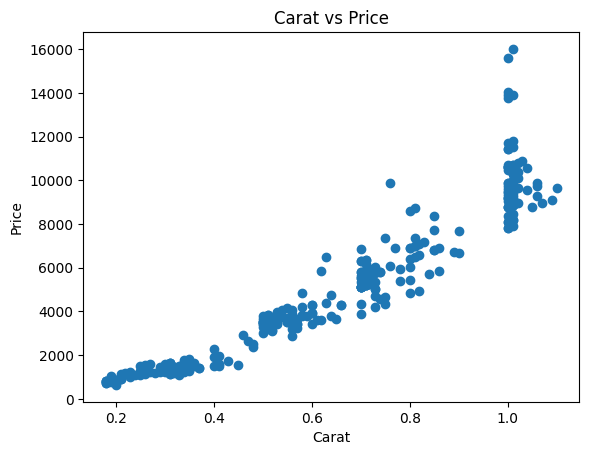

In [39]:
plt.scatter(X, Y)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Carat vs Price")
plt.show()

## Linear Regression

In [40]:
# Add a constant term to X
X = sm.add_constant(X)
X.head(2)
X.shape

(308, 2)

In [41]:
model_1 = sm.OLS(Y, X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          3.04e-150
Time:                        08:21:58   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.000   -2610.306   -1986.410
carat        1.16e+04    230.111     50.406      0.000    1.11e+04    1.21e+04
==============================================================================
Omnibus:                      170.301   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1324.411
Skew:                           2.168   Prob(JB):                    2.56e-288
Kurtosis:                      12.187   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
np.polyfit(X['carat'], Y, 1)

array([11598.88401288, -2298.35760189])

In [43]:
X.describe()

,const,carat
count,308.0,308.000000
mean,1.0,0.630909
std,0.0,0.277183
min,1.0,0.180000
25%,1.0,0.350000
50%,1.0,0.620000
75%,1.0,0.850000
max,1.0,1.100000


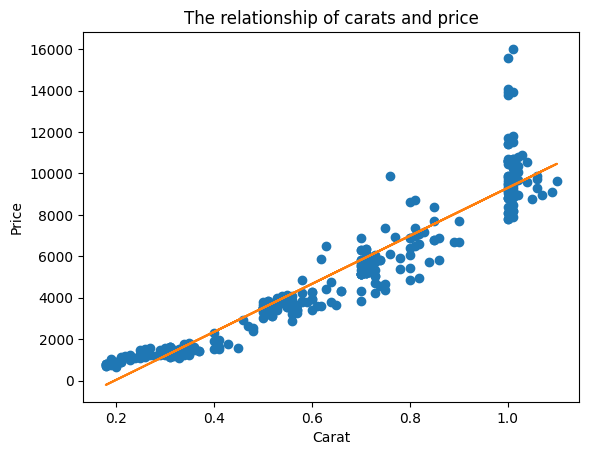

In [46]:
# Plot the regression curve
X = df.carat

# plotting the observations
plt.plot(X, Y, 'o')
b, a = np.polyfit(X, Y, 1)
plt.plot(X, a + b * X)

# Add title, x and y label
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("The relationship of carats and price")
plt.show()
#

## Linear Regression with dummy variables

In [47]:
# Create a binary variable
carat_above_average = np.where(df["carat"] > df["carat"].mean(), 1, 0)
carat_above_average

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
# add a constant to the carat_above_average
carat_above_average = sm.add_constant(carat_above_average)
carat_above_average

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [49]:
# Build the second regression model
model2 = sm.OLS(Y, carat_above_average).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     601.0
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           3.54e-74
Time:                        11:58:25   Log-Likelihood:                -2774.0
No. Observations:                 308   AIC:                             5552.
Df Residuals:                     306   BIC:                             5559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2307.1592    158.014     14.601      0.000    1996.228    2618.090
x1          5532.4235    225.674     24.515      0.000    5088.354    5976.493
==============================================================================
Omnibus:                       32.415   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.904
Skew:                           0.704   Prob(JB):                     1.08e-10
Kurtosis:                       4.262   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

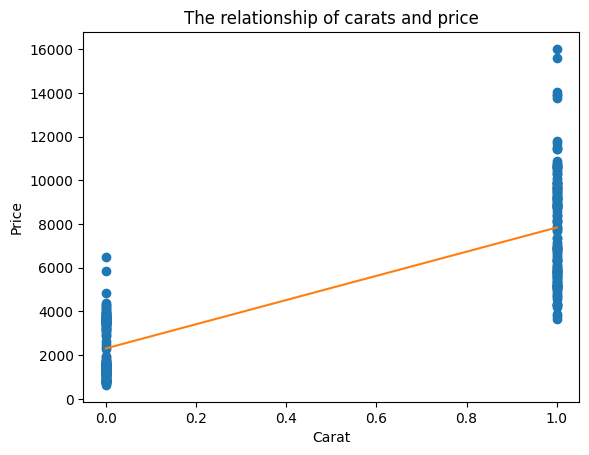

In [50]:
# Plot the curve and dots
carat_above_average = np.where(df["carat"] > df["carat"].mean(), 1, 0)
plt.plot(carat_above_average, Y, 'o')
b, a = np.polyfit(carat_above_average, Y, 1)
plt.plot(carat_above_average, a + b * carat_above_average)

# Customize the plot
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("The relationship of carats and price")
plt.show()


In [51]:
# Function to interpret the coefficient of a linear regression
def interpret_regression(model):
  """
  Interprets the coefficients of a linear regression model fitted using statsmodels.
  The function should detect whether a variable is binary or continuous, printing the interpretation accordingly.
  It also provided information about the statistical significante for each variable.
  It omits the intercept.
  """

  # Get the independent variables used in the regression
  X = model.model.exog
  variable_names = model.model.exog_names
  params = model.params
  pvalues = model.pvalues

  # Iterate through each independent variable
  for variable_name, param, pvalue in zip(variable_names, params, pvalues):
    # skipt the intercept
    if variable_name == "const":
      continue

    # Check if the variable is binary or continuous
    unique_values = np.unique(X[:, variable_names.index(variable_name)])
    if len(unique_values) == 2 and unique_values[0] != 0 and unique_values[1] !=1:
      print(f"For the binary variable {variable_name}: ")
    else:
      print(f"For the continuous variable {variable_name}: ")

    print(f"A change in this variable is associated with a change of {param:.2f} in the response variable")

    # Check the statistical significance and display it
    if pvalue < 0.05:
      print(f"The variable {variable_name} is statistically significant")
    else:
      print(f"The variable {variable_name} is not statistically significant")
    print('-' * 50)

In [54]:
# test the function
interpret_regression(model_1)

For the continuous variable carat: 
A change in this variable is associated with a change of 11598.88 in the response variable
The variable carat is statistically significant
--------------------------------------------------


## Categorical Variables

In [55]:
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [56]:
df["colour"].value_counts()

colour
F    82
G    65
H    61
E    44
I    40
D    16
Name: count, dtype: int64

In [57]:
# Loop through each of the categorical variables and count unique options
for cat in list(df.select_dtypes(include='object')):
    print(df[cat].value_counts())
    print('-' * 50)

colour
F    82
G    65
H    61
E    44
I    40
D    16
Name: count, dtype: int64
--------------------------------------------------
clarity
VS1     81
VVS2    78
VS2     53
VVS1    52
IF      44
Name: count, dtype: int64
--------------------------------------------------
certification
GIA    151
HRD     79
IGI     78
Name: count, dtype: int64
--------------------------------------------------


In [58]:
# Transform the categorical into binary
df_processed = pd.get_dummies(df, drop_first=True, dtype = int)
df_processed.head()

,Unnamed: 0,carat,price,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
0,1,0.30,1302,0,0,0,0,0,0,1,0,0,0,0
1,2,0.30,1510,1,0,0,0,0,1,0,0,0,0,0
2,3,0.30,1510,0,0,1,0,0,0,0,1,0,0,0
3,4,0.30,1260,0,0,1,0,0,1,0,0,0,0,0
4,5,0.31,1641,0,0,0,0,0,1,0,0,0,0,0


In [59]:
# isolate X and y
X = df_processed.drop(columns = ["price",	"Unnamed: 0"])
Y = df_processed["price"]

In [60]:
X

,carat,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
0,0.30,0,0,0,0,0,0,1,0,0,0,0
1,0.30,1,0,0,0,0,1,0,0,0,0,0
2,0.30,0,0,1,0,0,0,0,1,0,0,0
3,0.30,0,0,1,0,0,1,0,0,0,0,0
4,0.31,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
303,1.01,0,0,0,0,1,1,0,0,0,1,0
304,1.02,0,1,0,0,0,0,0,0,1,1,0
305,1.06,0,0,0,1,0,0,0,0,1,1,0
306,1.02,0,0,0,1,0,0,1,0,0,1,0


## Multilinear regression

In [61]:
# Add a constant to X
X = sm.add_constant(X)
X.head(2)

,const,carat,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
0,1.0,0.3,0,0,0,0,0,0,1,0,0,0,0
1,1.0,0.3,1,0,0,0,0,1,0,0,0,0,0


In [62]:
# Split the data into training test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=1502
    )
X_train.head()

,const,carat,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
87,1.0,0.63,1,0,0,0,0,0,0,0,0,0,0
121,1.0,1.00,0,1,0,0,0,1,0,0,0,0,0
13,1.0,0.33,0,0,0,0,1,0,1,0,0,0,0
259,1.0,0.73,0,0,1,0,0,0,0,1,0,1,0
165,1.0,0.20,0,0,0,0,0,1,0,0,0,0,1


In [66]:
# Perform the multilinear regression
model3 = sm.OLS(Y_train, X_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     484.6
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          2.89e-157
Time:                        14:08:40   Log-Likelihood:                -1945.6
No. Observations:                 246   AIC:                             3917.
Df Residuals:                     233   BIC:                             3963.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               251.7901    297.740      0.846      0.399    -334.816     838.396
carat              1.272e+04    204.403     62.241      0.000    1.23e+04    1.31e+04
colour_E          -1556.1724    242.718     -6.411      0.000   -2034.374   -1077.970
colour_F          -1830.4279    231.456     -7.908      0.000   -2286.442   -1374.414
colour_G          -2261.0647    236.301     -9.569      0.000   -2726.625   -1795.504
colour_H          -2815.6948    241.619    -11.653      0.000   -3291.732   -2339.657
colour_I          -3298.3717    252.202    -13.078      0.000   -3795.260   -2801.483
clarity_VS1       -1459.0790    173.857     -8.392      0.000   -1801.611   -1116.547
clarity_VS2       -1851.1040    181.530    -10.197      0.000   -2208.754   -1493.454
clarity_VVS1       -862.5884    172.549     -4.999      0.000   -1202.543    -522.633
clarity_VVS2      -1176.4051    158.624     -7.416      0.000   -1488.926    -863.884
certification_HRD    46.9913    113.696      0.413      0.680    -177.013     270.995
certification_IGI   119.1396    136.946      0.870      0.385    -150.672     388.951
==============================================================================
Omnibus:                       78.078   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.254
Skew:                           1.336   Prob(JB):                     1.02e-55
Kurtosis:                       7.192   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Predictions
predictions = model3.predict(X_test)
predictions[:5]

92     5437.226047
101    5264.263649
106    8617.077476
148    9070.583351
289    8860.077924
dtype: float64

In [65]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# measure the accuracy
print(f"RMSE: {root_mean_squared_error(Y_test, predictions):.2f}")
print(f"MAE: {mean_absolute_error(Y_test, predictions):.2f}")
print(f"MAPE: {100 * mean_absolute_percentage_error(Y_test, predictions):.2f} %")

RMSE: 846.14
MAE: 521.75
MAPE: 21.32 %
